## Problem 3.1 - Polynomial Ridge Regression

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### a) Training/Testing errors for different degrees with Ridge Regression

In [3]:
# defining variables
lamda = 0.1
degrees = range(1,15)

In [4]:
# define ground truth function
def f(x):
    return x**2

In [5]:
# generating data on the interval [-1,1]
n_samples = 100
np.random.seed(42)
X = np.random.uniform(-1, 1, n_samples)
y = f(X) + np.random.normal(0, 0.15, n_samples)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
# consider training and testing errors for polynomial models of degree 1 to 14
train_errors = []
test_errors = []

for k in degrees:
    # create polynomial features
    poly = PolynomialFeatures(k)
    X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))
    
    # fit ridge regression model
    model = linear_model.Ridge(alpha = lamda, fit_intercept = False)
    model.fit(X_train_poly, y_train)
    
    # compute training and testing errors
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # compute mean squared errors for training and testing sets
    train_error = np.mean(1 - model.score(X_train_poly, y_train))
    test_error = np.mean(1 - model.score(X_test_poly, y_test))
    
    train_errors.append(train_error)
    test_errors.append(test_error)

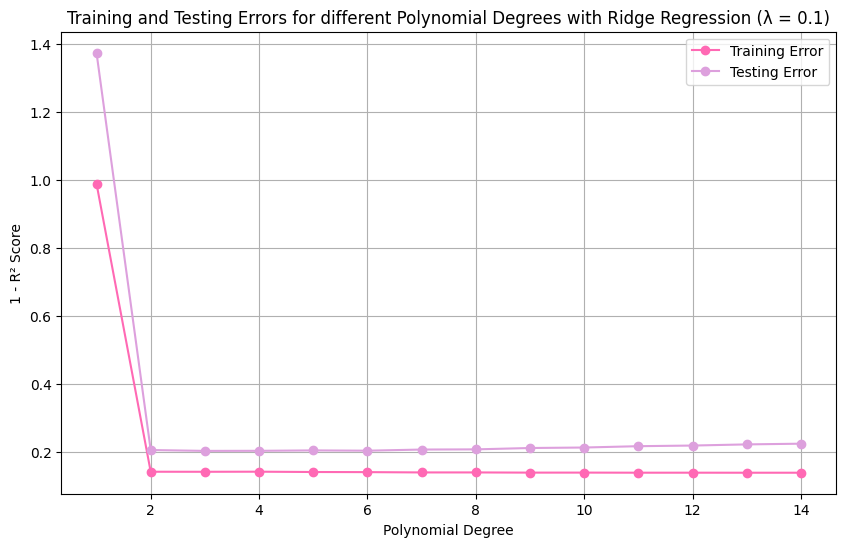

In [7]:
# plotting the errors vs polynomial degree
plt.figure(figsize=(10,6))
plt.plot(degrees, train_errors, label = 'Training Error', marker = 'o', color = 'hotpink')
plt.plot(degrees, test_errors, label = 'Testing Error', marker = 'o', color = 'plum')
plt.xlabel('Polynomial Degree')
plt.ylabel('1 - R² Score')
plt.title('Training and Testing Errors for different Polynomial Degrees with Ridge Regression (λ = 0.1)')
plt.legend()
plt.grid()
plt.show()

#### Observations:
In contrary to the example on the last sheet the test error is not exploding with higher degree. This matches the goal of the Ridge Regression model, which is to prevent overfitting by adding a regularization term.

### b) Tuning the regularisation parameter for fixed k = 5

In [8]:
# defining lambda values an k 
lambdas = np.power(10,np.linspace(-6,1,100))
k = 5  

In [9]:
# performing ridge regression for different lambda values
train_errors_lambda = []
test_errors_lambda = []

# create polynomial features
poly = PolynomialFeatures(k)
X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

for l in lambdas:
    # fit ridge regression model
    model = linear_model.Ridge(l, fit_intercept = False)
    model.fit(X_train_poly, y_train)
    
    # compute training and testing errors
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # compute mean squared errors for training and testing sets
    train_error = np.mean((y_train - y_train_pred) ** 2)
    test_error = np.mean((y_test - y_test_pred) ** 2)
    
    train_errors_lambda.append(train_error)
    test_errors_lambda.append(test_error)

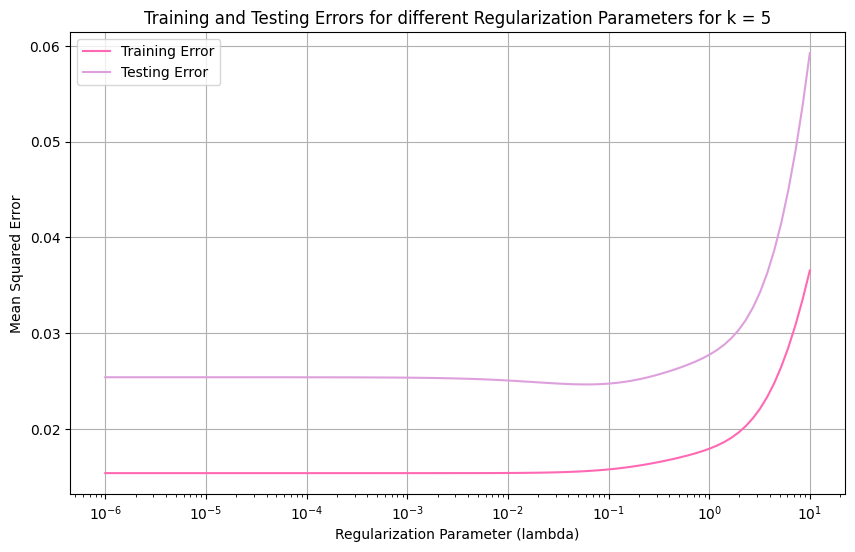

In [10]:
# plot the error curves 
plt.figure(figsize=(10,6))
plt.semilogx(lambdas, train_errors_lambda, label = 'Training Error', color = 'hotpink')
plt.semilogx(lambdas, test_errors_lambda, label = 'Testing Error', color = 'plum')   
plt.xlabel('Regularization Parameter (lambda)')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors for different Regularization Parameters for k = 5')
plt.legend()
plt.grid()
plt.show()

In [11]:
# chosing a lambda value as the minimum of the test error curve
chosen_lambda = lambdas[np.argmin(test_errors_lambda)]
print("The optimal lambda according to the test error curve is:", chosen_lambda)
minimum_test_error = min(test_errors_lambda)
print("The minimum test error is:", minimum_test_error)

The optimal lambda according to the test error curve is: 0.06428073117284319
The minimum test error is: 0.024666009435424845


We can see that the tarining error decreases with a smaller lambda, however the test error gets the smallest when we chose lamda at around 0.064. When chosing a larger lambda we tend to underfit the model since the coefficients have to be kept smaller. When the lamda gets too small we overfit. The regularization term can be almost ignorend and the approximation fits the noisy data as good as possible.  

#### c) plotting f, noisy samples and approximation

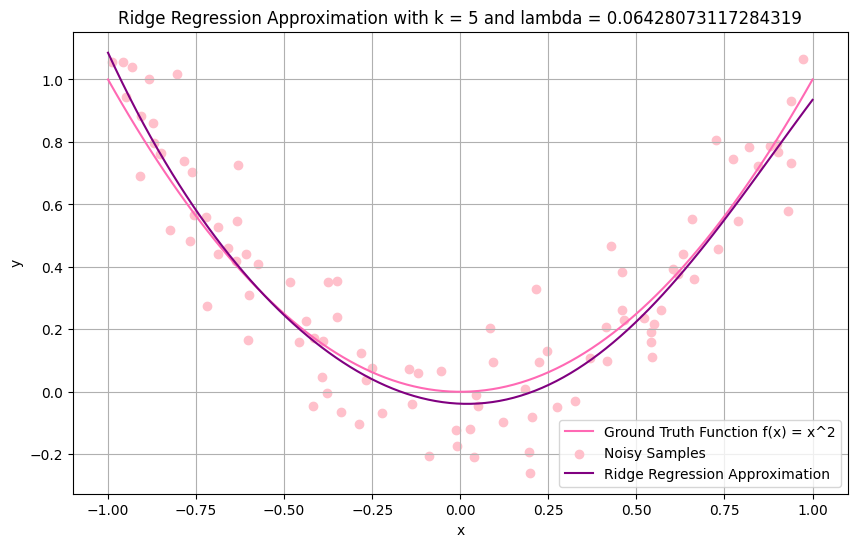

In [12]:
# create polynomial features
poly = PolynomialFeatures(k)
X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

# fit ridge regression model
model = linear_model.Ridge(chosen_lambda, fit_intercept = False)
model.fit(X_train_poly, y_train)

# generate points for plotting
X_plot = np.linspace(-1, 1, 100)
X_plot_poly = poly.transform(X_plot.reshape(-1, 1))
y_plot_pred = model.predict(X_plot_poly)

# plot the results
plt.figure(figsize=(10,6))
plt.plot(X_plot, f(X_plot), label = 'Ground Truth Function f(x) = x^2', color = 'hotpink')
plt.scatter(X, y, label = 'Noisy Samples', color = 'pink')
plt.plot(X_plot, y_plot_pred, label = 'Ridge Regression Approximation', color = 'purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression Approximation with k = 5 and lambda = {}'.format(chosen_lambda))
plt.legend()
plt.grid()
plt.show()

We can see that with our choice of lambda we follow the shape of the true ground function very closely in the interval we are looking at, which was our goal. 